# 1. Load the dataset and examine its structure

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import altair as alt

In [5]:
df = pd.read_csv('Titanic-Dataset.csv')

In [6]:
# Display the first few rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# 2. Exploratory Data Analysis (EDA)

* Check for missing values and get summary statistics.

In [7]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Get summary statistics
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
# Display the unique values in categorical columns
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


# 3. Data Preprocessing

* Handle missing values, encode categorical variables, and scale the features.

In [19]:
# Handle missing values
imputer_age = SimpleImputer(strategy='mean')
df['Age'] = imputer_age.fit_transform(df[['Age']]).ravel()

imputer_embarked = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer_embarked.fit_transform(df[['Embarked']]).ravel()

In [20]:
# Drop the 'Cabin' column if it exists
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)


In [21]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [22]:
# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8212290502793296
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
[[92 13]
 [19 55]]


In [40]:
# Calculate percentages for the heatmap
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

# Annotate the heatmap with percentages and counts
labels = [f"{value}\n{percentage:.2f}%" for value, percentage in zip(conf_matrix.flatten(), conf_matrix_percent.flatten())]
labels = np.array(labels).reshape(2, 2)

# Plot heatmap of the confusion matrix with percentages
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_percent, annot=labels, fmt='', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap with Percentages')
plt.show()

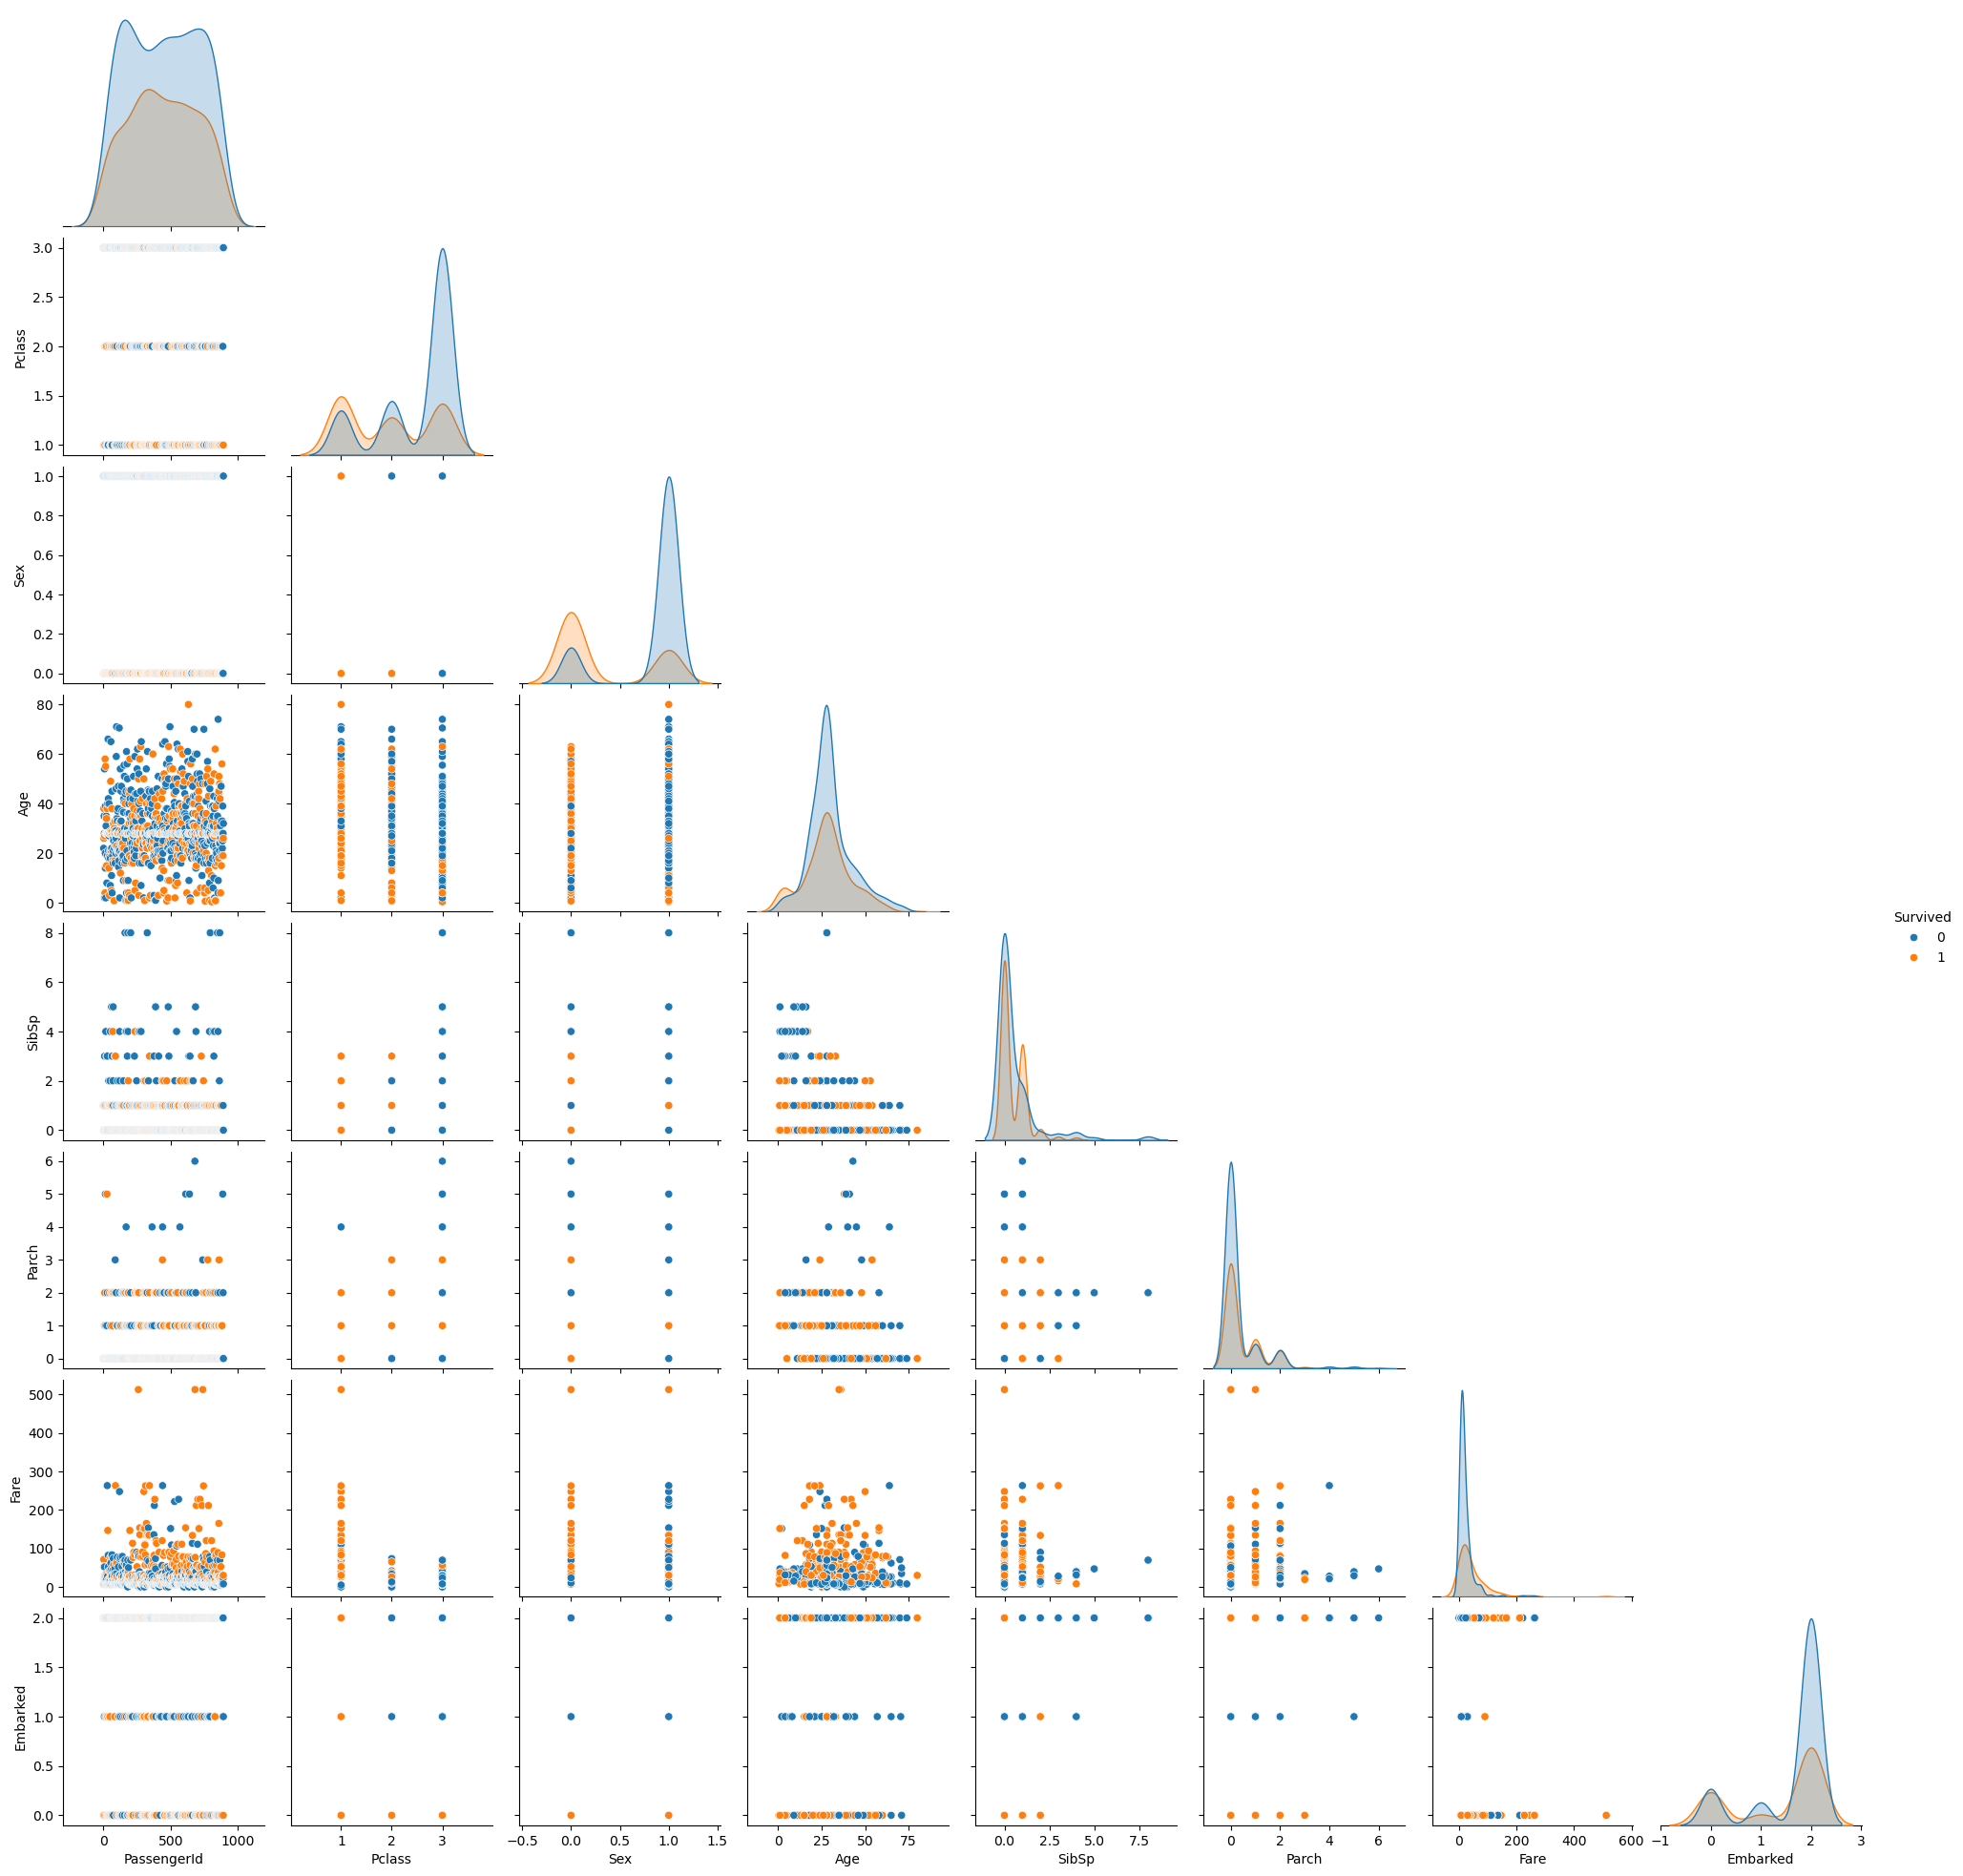

In [45]:
_ = sns.pairplot(df, hue="Survived", corner=True)

In [51]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            square=True,
            linewidths=0.5,
            cmap='coolwarm',
            cbar_kws={'shrink': 0.4, 'ticks': [-1, -0.5, 0, 0.5, 1]},
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size': 12},
            mask=mask
           )
plt.title('Correlation Matrix Heatmap')
plt.show()

# 4. Prediction

In [61]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = df[features]
y = df[target]

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Train the models
model_linreg = LinearRegression()
model_dtree = DecisionTreeRegressor()

model_linreg.fit(X_train, y_train)
model_dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [64]:
# Create a new data entry for prediction
X_new_dict = {"Pclass": 3, "Sex": 1, "Age": 30, "SibSp": 0, "Parch": 0, "Fare": 7.25, "Embarked": 1}
X_new = pd.DataFrame([X_new_dict])

# Make predictions
y_pred_linreg = model_linreg.predict(X_new)
y_pred_dtree = model_dtree.predict(X_new)

# Define the mappings
gender = {0: 'female', 1: 'male'}
embarked = {0: 'Cherbourg', 1: 'Queenstown', 2: 'Southampton'}

# Print predictions in a formatted manner
print('PREDICTION:')
print(f' - Pclass          : {X_new_dict["Pclass"]}')
print(f' - Gender          : {gender[X_new_dict["Sex"]]}')
print(f' - Age             : {X_new_dict["Age"]}')
print(f' - SibSp           : {X_new_dict["SibSp"]}')
print(f' - Parch           : {X_new_dict["Parch"]}')
print(f' - Fare            : ${X_new_dict["Fare"]}')
print(f' - Embarked        : {embarked[X_new_dict["Embarked"]]}')
print(f' - Survived (linreg): {y_pred_linreg[0]:.2f}')
print(f' - Survived (dtree) : {y_pred_dtree[0]:.2f}')

PREDICTION:
 - Pclass          : 3
 - Gender          : male
 - Age             : 30
 - SibSp           : 0
 - Parch           : 0
 - Fare            : $7.25
 - Embarked        : Queenstown
 - Survived (linreg): 0.13
 - Survived (dtree) : 0.00


# Analysis of Survival Distribution

The pie chart for survival distribution shows the proportion of passengers who survived versus those who did not. From the chart, we can see that a larger percentage of passengers did not survive (around 61.6%) compared to those who survived (around 38.4%). This indicates that the majority of passengers on the Titanic were unable to survive the disaster.


In [66]:
# Pie chart for Survived
survived_counts = df['Survived'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Survival Distribution')
plt.show()

# Analysis of Class Distribution

The pie chart for class distribution shows the proportion of passengers in each ticket class. The majority of passengers were in 3rd class (around 55.1%), followed by 1st class (around 24.2%) and 2nd class (around 20.7%). This distribution highlights the social stratification present on the Titanic, with a significant number of lower-class passengers.


In [67]:
# Pie chart for Pclass
pclass_counts = df['Pclass'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(pclass_counts, labels=['3rd Class', '1st Class', '2nd Class'], autopct='%1.1f%%', startangle=140, colors=['blue', 'yellow', 'cyan'])
plt.title('Class Distribution')
plt.show()

# Analysis of Gender Distribution

The pie chart for gender distribution shows the proportion of male and female passengers. There were more male passengers (around 64.8%) compared to female passengers (around 35.2%). This gender distribution can be important when analyzing survival rates, as different survival rates were observed for men and women.


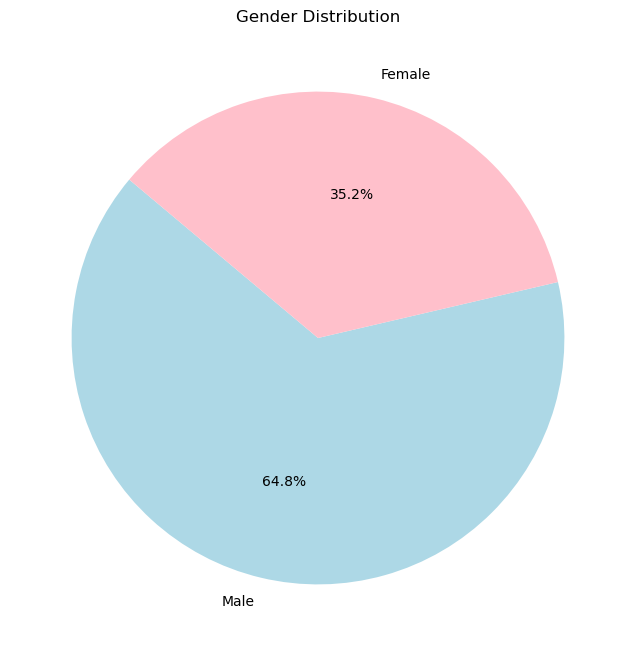

In [68]:
# Pie chart for Sex
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.show()

# Analysis of Age Distribution

The histogram of age distribution shows the range of ages among passengers on the Titanic. Most passengers were between 20 and 40 years old, with a noticeable number of children and elderly passengers as well. This distribution helps us understand the demographic profile of the passengers.


In [70]:
# Age Distribution
plt.figure(figsize=(10, 6))
df['Age'].hist(bins=30, color='c', edgecolor='k', alpha=0.7)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(False)
plt.show()

# Analysis of Fare Distribution

The histogram of fare distribution shows the range of fares paid by passengers on the Titanic. The majority of passengers paid lower fares, indicating that many were in the lower classes. There are a few passengers who paid significantly higher fares, representing those in the first class.


In [71]:
# Fare Distribution
plt.figure(figsize=(10, 6))
df['Fare'].hist(bins=30, color='orange', edgecolor='k', alpha=0.7)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.grid(False)
plt.show()

# Survival vs Fare:

There is a noticeable trend where passengers who survived generally paid higher fares compared to those who did not. This might suggest that higher fare-paying passengers were more likely to be in better accommodations or have better survival chances.

In [88]:
# Create the Altair chart
chart = alt.Chart(df).mark_circle(size=60).encode(
    x='Age:Q',
    y='Fare:Q',
    color='Survived:N',
    tooltip=['PassengerId', 'Name', 'Age', 'Fare']
).properties(
    width=600,
    height=400,
    title='Age vs Fare with Survival Status'
)

chart.show()

alt.Chart(...)